In [1]:
# 线性回归
# y(w,x) = w0 + w1x1 + w2x2 + ... + wixi
import numpy as np
from sklearn.linear_model import LinearRegression
# 输入变量必须是列向量，而输出的这个变量则相对自由
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X,np.array([1,2])) + 3
# 拟合
reg = LinearRegression()
reg.fit(X, y)
# 系数
reg.coef_
# 偏差值
reg.intercept_
# 预测
reg.predict(np.array([[3, 5]]))

array([16.])

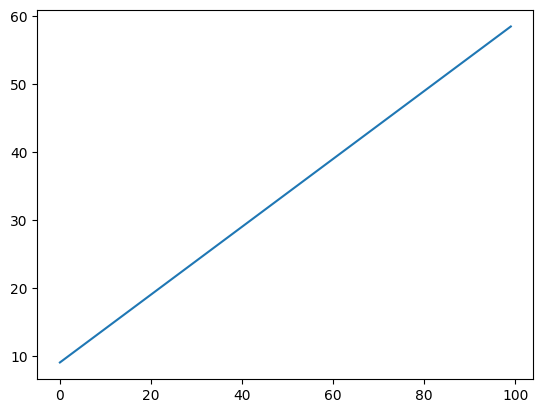

In [2]:
# 案例
# 拟合y = ax + b
# reshape满足数据结构要求
# X = np.arange(1,101).reshape(-1,1)
X = np.reshape(np.arange(100),[-1,1])
y = np.dot(X,0.5) + 9
# 查看散点图
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(8,5))
# ax.scatter(X,y);
# 拟合
reg = LinearRegression()
reg.fit(X,y)
# 系数
reg.coef_
# 偏差
reg.intercept_
# 预测
reg.predict(np.array([[200]]))
# 模型评估
reg.score(X,y)
# 可视化
ax.plot(X,y);

In [3]:
# 深入
# y = f(w,x)
# 线性回归——>线性函数；非线性模型——>非线性函数；logistic回归——>logistic函数；
# 多层感知机——>复合函数；SVM——>多个核函数的线性组合
# 支持向量机（SVM）
import numpy as np
from sklearn.svm import SVR
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
# 拟合
model = SVR()
model.fit(X,y)
# 预测
model.predict(X)
print(model.score(X,y))
# 调参 y = f(h,w;x)
# 高斯核作为它的核函数，同时将核参数设为1，惩罚系数设为100
model = SVR(kernel='rbf',gamma= 1, C = 100)
model.fit(X,y)
model.predict(X)
print(model.score(X,y))

0.6772251311112314
0.9978722127895988


In [12]:
# 调参的基本思想--交叉验证(Cross Validation)
# 根本目的实际上就是要找到一组合适的超参数，使得模型具有列好的效果，而更专业的说法则是希望让模型得到更好的泛化性能
# 最为广泛的调参方法之一便是交叉验证
# 将样本拆分为k个子集，用其中k-1个子集的数据训练模型，再在剩下的一个子集上验证模型的性能。
# 当所有子集都被作为测试集轮完一圈之后，计算模型在所有子集上的平均性能。
# 对每一组超参数对应模型执行上述操作，选出平均性能最好的一组参数作为最优参数。
# 自动调参
# 网格搜索的交叉验证法GridSearchCV和随机调参方法RandomizedSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# 数据导入
iris = datasets.load_iris()
# 参数设定
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# 拟合调参
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
# 模型评估
sorted(clf.cv_results_.keys())
# 最优参数
clf.best_params_
# 最优模型
clf.best_estimator_
clf.best_estimator_.predict(iris.data)
# 并行计算-慎用
# # 使用两个核心并行
# clf = GridSearchCV(svc, parameters, n_jobs =2)
# # 使用全部的核心并行
# clf = GridSearchCV(svc, parameters, n_jobs =-1)
# 自定义调参-开源

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# 集成学习
# 采用同一基模型，在样本的不同子集上进行训练，从而得到对应的多个不同的具体模型。
# 这类学习方法的代表就是boosting, bagging。通常为ensemble_method(estimator,**args)
# 采用多种基模型，在同一样本上进行训练，将多个模型组合起来得到具体模型。
# voting和stacking都是采用这类方式。通常为ensemble_method(estimators,**args)
# estimators = [
#     ('lr', RidgeCV()),
#     ('svr', LinearSVR(random_state=42))
#     ]
# 单一模型集成 - - 以Adaboost为例
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# 数据导入
X, y = load_iris(return_X_y=True)
# 单一模型集成拟合
clf = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=100)
clf.fit(X,y)
# 预测
clf.predict(X) 
# 评估
clf.score(X,y)
# 多模型集成 - - 以Voting例
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]
